# AIxFuse for GSK3β|JNK3 RORγt|DHODH: Best Practice

## Environments and Global Variables

In [5]:
import sys
import os
import importlib
sys.path.append('utils')
import utils_chem
importlib.reload(utils_chem)
import utils_common
importlib.reload(utils_common)
from rdkit import Chem
import numpy as np

## Building Active Ligand Libraries → data/inputs

In [4]:
utils_common.dedup('data/inputs/active_ligands/gsk3b/gsk3b_backup.csv','data/inputs/active_ligands/gsk3b/gsk3b.csv')

5815it [00:01, 3849.41it/s]


In [ ]:
act_lig_raw_csv_rorgt='data/inputs/active_ligands/rorgt/rorgt_undedup.csv'
act_lig_csv_rorgt='data/inputs/active_ligands/rorgt/rorgt.csv'

act_lig_raw_csv_dhodh='data/inputs/active_ligands/dhodh/dhodh_undedup.csv'
act_lig_csv_dhodh='data/inputs/active_ligands/dhodh/dhodh.csv'

In [ ]:
utils_common.dedup(act_lig_raw_csv_rorgt,act_lig_csv_rorgt)

11142it [00:03, 3251.12it/s]


In [ ]:
utils_common.dedup(act_lig_raw_csv_dhodh,act_lig_csv_dhodh)

2863it [00:00, 3740.34it/s]


## Docking Pose and Interaction Analysis

### Environments and Variables

In [3]:
import utils_inter
importlib.reload(utils_inter)
import extr_core_info
importlib.reload(extr_core_info)

act_lig_csv_rorgt='data/inputs/active_ligands/rorgt/rorgt.csv'
tgt_str_pdb_rorgt='data/inputs/target_structures/pdbs/5NTP_-_minimized.pdb'
docking_mae_rorgt='data/outputs/docking/rorgt/act.maegz'
docking_sdf_rorgt='data/outputs/docking/rorgt/act.sdf'
docking_pdb_pose_rorgt='data/outputs/docking/rorgt/act_pdbs_pose'
docking_pdb_comp_rorgt='data/outputs/docking/rorgt/act_pdbs_comp'

act_lig_csv_dhodh='data/inputs/active_ligands/dhodh/dhodh.csv'
tgt_str_pdb_dhodh='data/inputs/target_structures/pdbs/6QU7_-_minimized.pdb'
docking_mae_dhodh='data/outputs/docking/dhodh/act_dhodh_XP.maegz'
docking_sdf_dhodh='data/outputs/docking/dhodh/act_dhodh_XP.sdf'
docking_pdb_pose_dhodh='data/outputs/docking/dhodh/act_pdbs_pose'
docking_pdb_comp_dhodh='data/outputs/docking/dhodh/act_pdbs_comp'


### RORγt|DHODH

#### Docking for Active Ligands

In [3]:
# merge docked ligands and protein as pdb format
utils_common.merge_pdbs(tgt_str_pdb_rorgt, docking_pdb_pose_rorgt, docking_pdb_comp_rorgt)
# utils_common.merge_pdbs(tgt_str_pdb_dhodh, docking_pdb_pose_dhodh, docking_pdb_comp_dhodh)


In [7]:
utils_common.merge_pdbs('data/inputs/target_structures/pdbs/6Y9S_-_minimized.pdb', 'data/outputs/docking/gsk3b/act_pdbs_pose'
                        , 'data/outputs/docking/gsk3b/act_pdbs_comp')
# utils_common.merge_pdbs('data/inputs/target_structures/pdbs/4WHZ_-_minimized.pdb', 'data/outputs/docking/jnk3/act_pdbs_pose'
#                         , 'data/outputs/docking/jnk3/act_pdbs_comp')

5664


#### Core Extraction

In [ ]:
core_info_rorgt=extr_core_info.get_cores(479,act_lig_csv_rorgt,tgt_str_pdb_rorgt,docking_sdf_rorgt,6)

1 COc1ccc(C(=O)Nc2cnc3c(c(C4CCN(C(=O)C(C)C(C)(C)C)C(C)(C)C4)cn3C)c2C)cc1C#N
1 COc1ccc(C(=O)Nc2cnc3c(c(C4CCN(C(=O)C5CCCC5)C(C)(C)C4)cn3C)c2C)cc1C#N
1 Cc1c(NC(=O)c2cccc(C#N)c2)cnc2c1c(C1CCN(C(=O)C3CCCC3)CC1C)cn2C
1 Cc1ccc(C(=O)Nc2cn3ncnc3c(CN3CCN(C(=O)C4CCC(F)(F)C4)C(C)C3)c2C)cn1
1 COc1ccc(C(=O)Nc2cnc3c(c(C4CCN(C(=O)C(C)C)CC4C)cn3C)c2C)cc1C#N
1 Cc1cc(C(F)(F)F)cc2c1nc(Cc1c(Cl)ccc(C(=O)NC3CCC(O)CC3)c1Cl)n2C
1 O=S(=O)(c1ccc(F)cc1)C1(c2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2)CC(O)C(O)C1
1 COc1ccc(C(=O)Nc2cnc3c(c(C4C5CCC4CN(C(=O)C4CCCC4)C5)cn3C)c2C)cc1C#N
1 O=C(NC1CCC2(S(=O)(=O)c3ccc(F)cc3)c3ccc(C(F)(C(F)(F)F)C(F)(F)F)cc3CCC12)C1CC(=O)N(CCO)C1
1 O=C(NC1CCC2(S(=O)(=O)c3ccc(F)cc3)c3ccc(C(F)(C(F)(F)F)C(F)(F)F)cc3CCC12)C1(O)CCS(=O)(=O)CC1
1 O=C(NC1CCC2(S(=O)(=O)c3ccc(F)cc3)c3ccc(C(F)(C(F)(F)F)C(F)(F)F)cc3CCC12)c1ccncc1F
1 CC(C)n1nc(C(N)=O)cc1-c1ccc(N(C)C(=O)c2c(F)cccc2Cl)c(OCC(F)(F)F)c1
1 O=C(NC1CCC2(S(=O)(=O)c3ccc(F)cc3)c3ccc(C(F)(C(F)(F)F)C(F)(F)F)cc3CCC12)c1ccc(=O)[nH]c1
1 CC1C(=O)C(C#N)=CC2(C)c3nc(N)n

In [ ]:
core_info_dhodh=extr_core_info.get_cores(47,act_lig_csv_dhodh,tgt_str_pdb_dhodh,docking_sdf_dhodh,3)

1 C=C(C)C(O)CCC(C)=CCCC(C)=CCc1c(O)c(Cl)c(C)c(C=O)c1O


[117, 113, 88, 79, 47, 40, 39, 28, 28, 23, 22, 20, 18, 18, 18, 17, 16, 14, 14, 14, 13, 13, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

/home/chensheng/anaconda3/envs/mtdd/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:252: UserWarning: Truncating the list of molecules to be displayed to 60. Change the maxMols value to display more.
  warnings.warn(


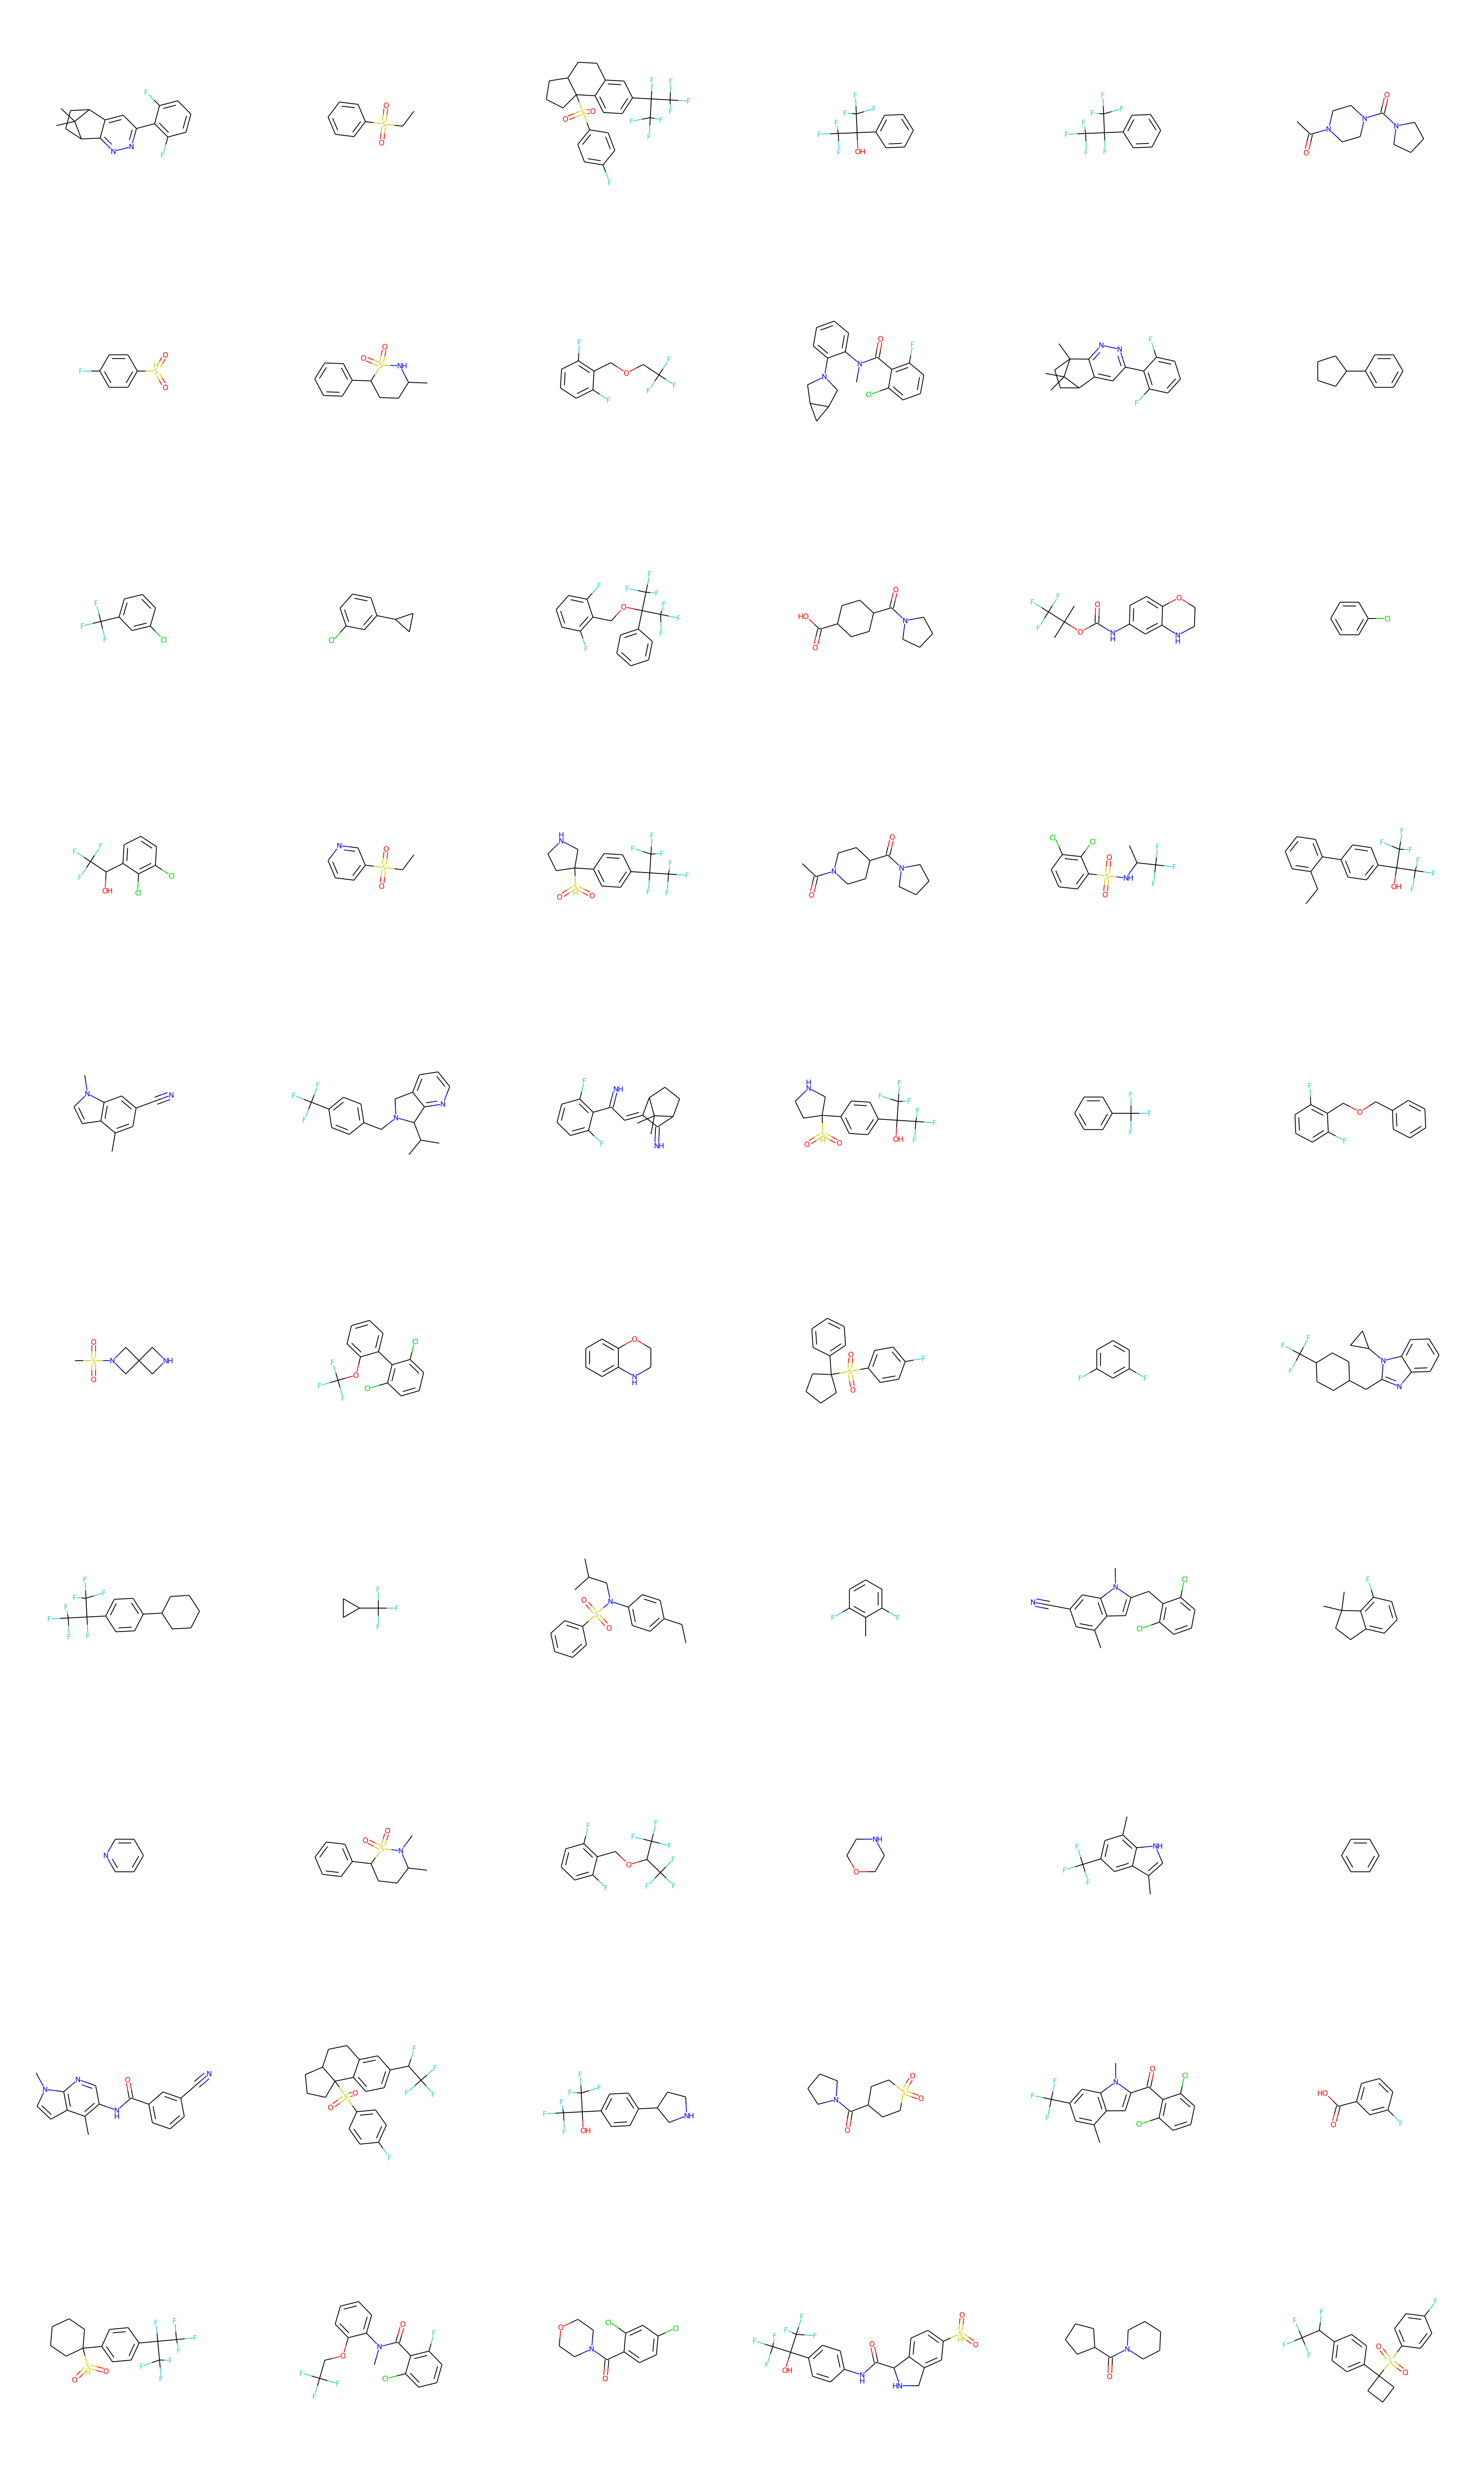

In [ ]:
mol_list=[]
count_list=[]
for smiles in core_info_rorgt:
    mol_list.append(Chem.MolFromSmiles(smiles))
    count_list.append(len(core_info_rorgt[smiles]['act_mols']))
arg_idx=np.argsort(count_list)[::-1]
count_list=[count_list[i] for i in arg_idx]
mol_list=[mol_list[i] for i in arg_idx]
print(count_list,sum(count_list))
Chem.Draw.MolsToGridImage(mol_list,molsPerRow=6,subImgSize=(600,600),maxMols=60)

[103, 100, 28, 22, 20, 20, 20, 18, 17, 17, 14, 13, 12, 11, 11, 11, 10, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 976


/home/chensheng/anaconda3/envs/mtdd/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:252: UserWarning: Truncating the list of molecules to be displayed to 60. Change the maxMols value to display more.
  warnings.warn(


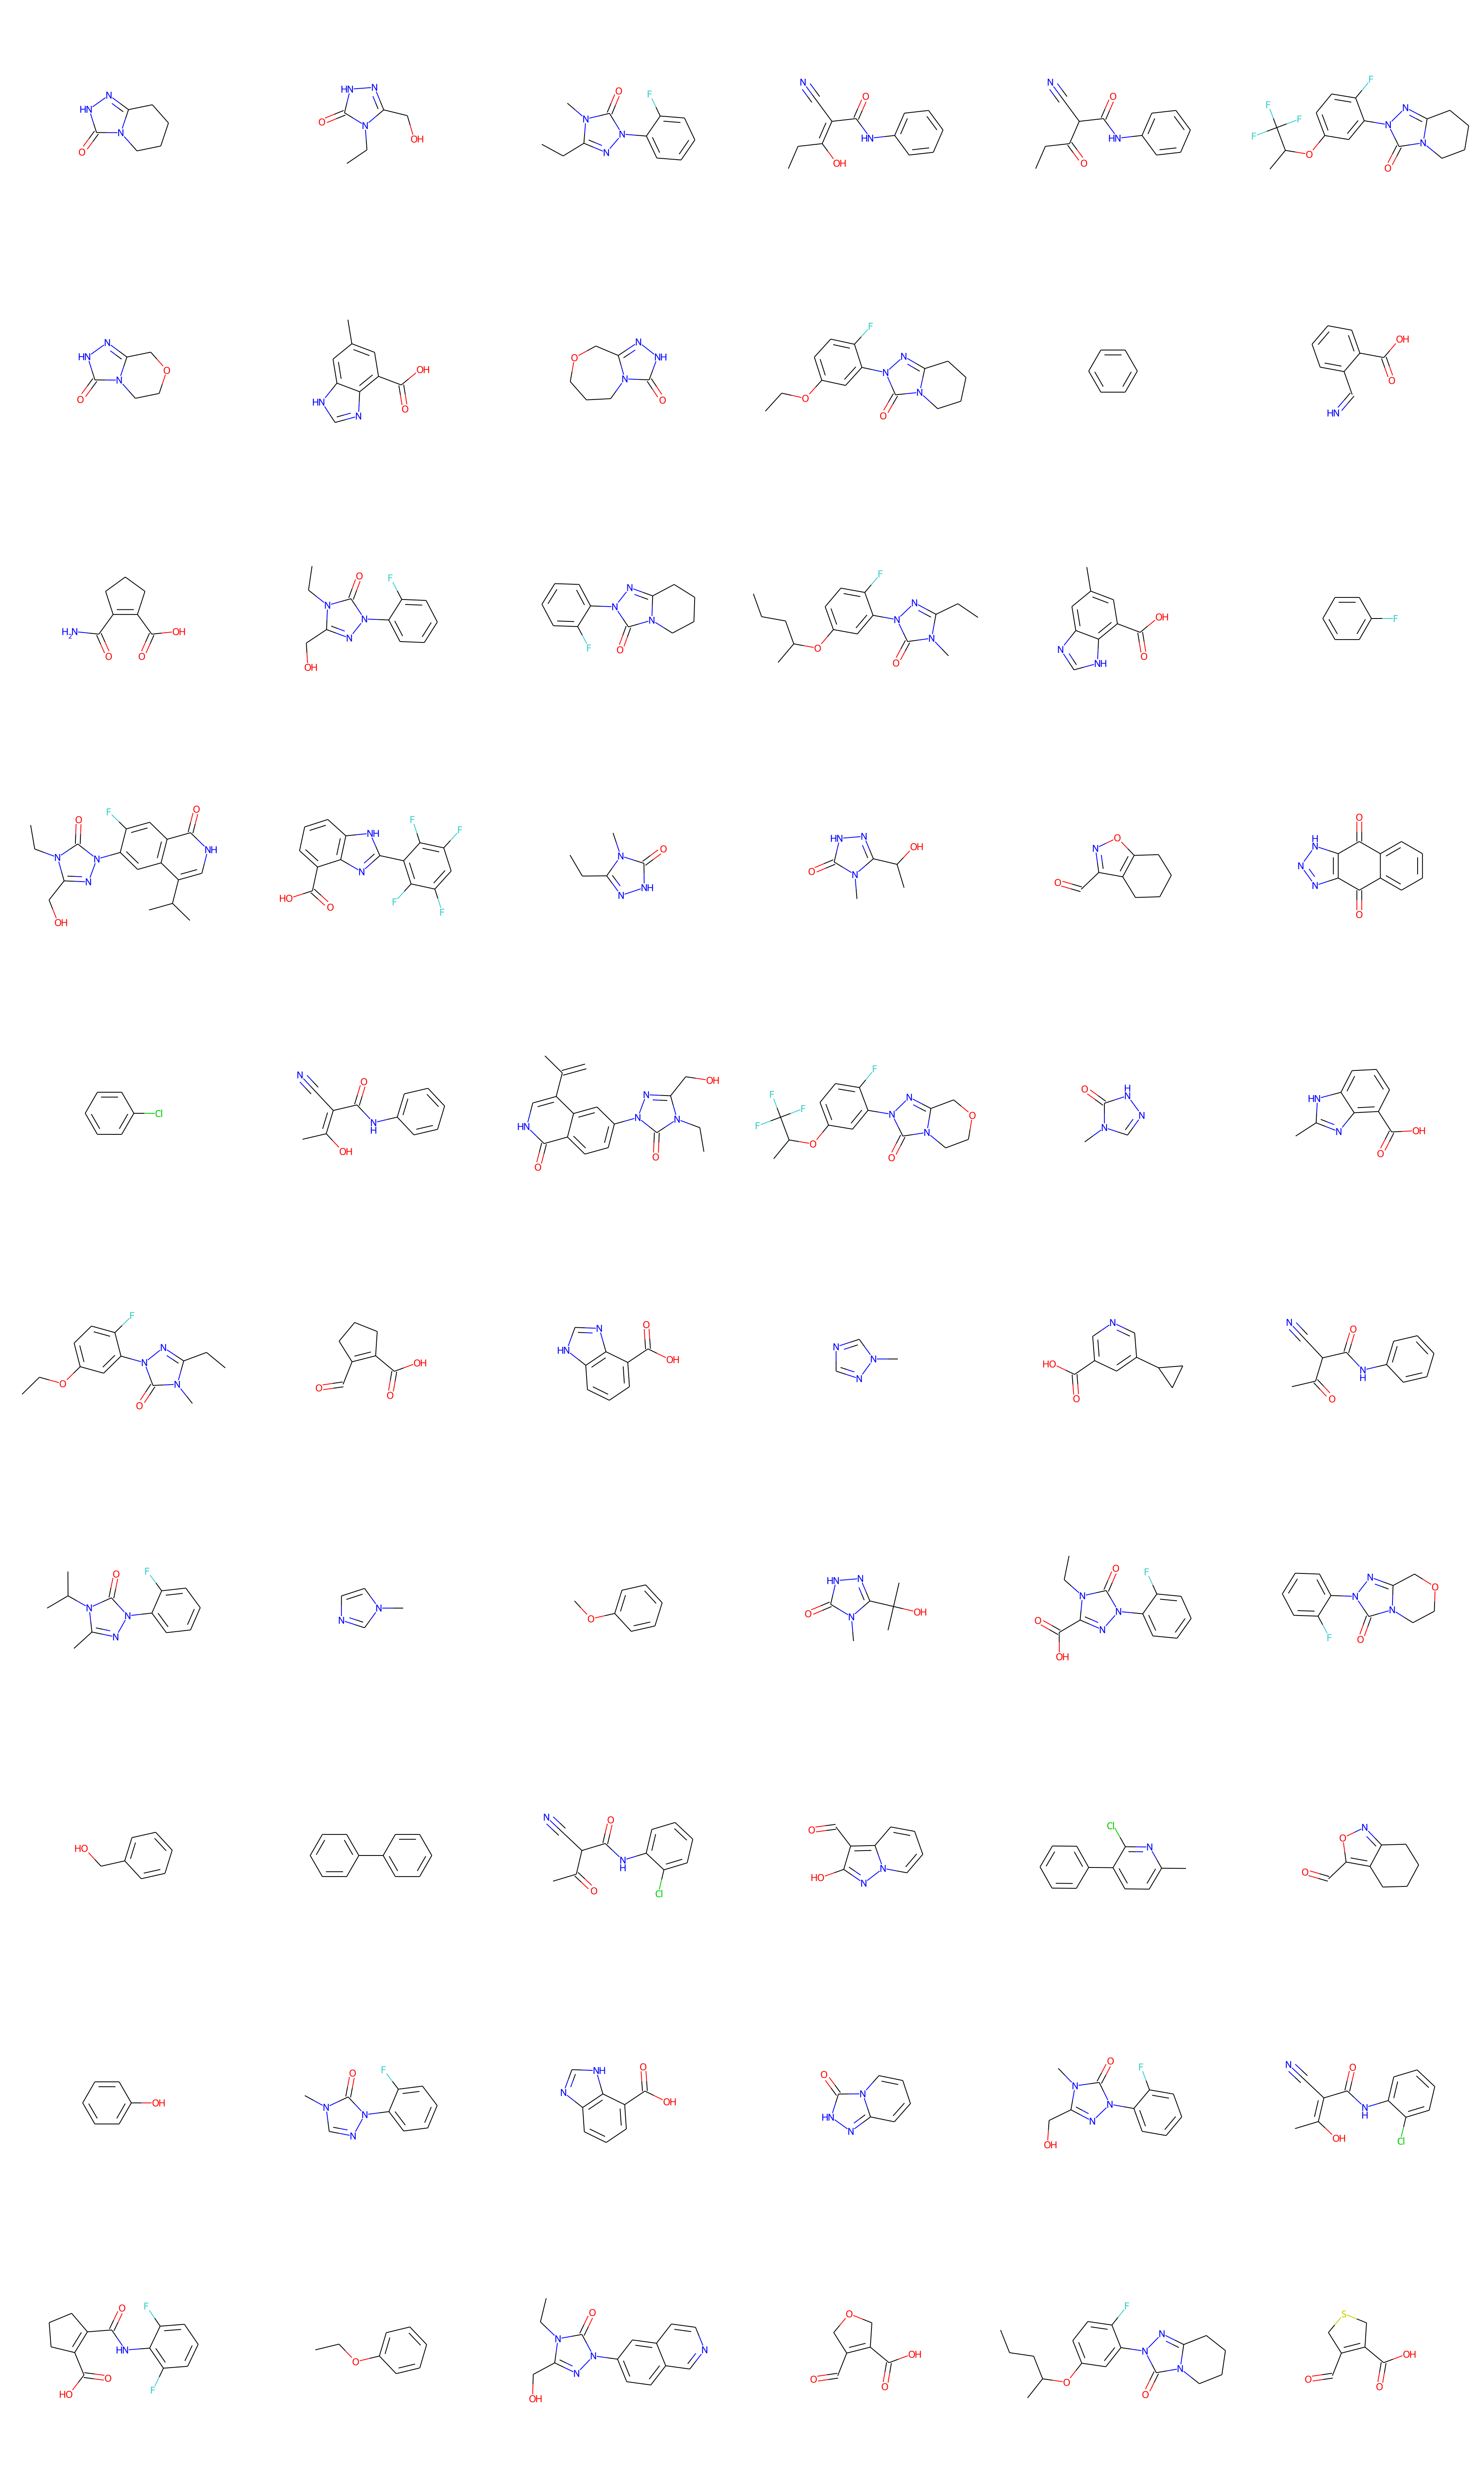

In [ ]:
mol_list=[]
count_list=[]
for smiles in core_info_dhodh:
    mol_list.append(Chem.MolFromSmiles(smiles))
    count_list.append(len(core_info_dhodh[smiles]['act_mols']))
arg_idx=np.argsort(count_list)[::-1]
count_list=[count_list[i] for i in arg_idx]
mol_list=[mol_list[i] for i in arg_idx]
print(count_list,sum(count_list))
Chem.Draw.MolsToGridImage(mol_list,molsPerRow=6,subImgSize=(600,600),maxMols=60)

In [ ]:
import utils_inter
importlib.reload(utils_inter)
import extr_core_info
importlib.reload(extr_core_info)


act_lig_csv_rorgt='data/inputs/active_ligands/rorgt/rorgt.csv'
tgt_str_pdb_rorgt='data/inputs/target_structures/pdbs/5NTP_-_minimized.pdb'
docking_mae_rorgt='data/outputs/docking/rorgt/act.maegz'
docking_pdb_pose_rorgt='data/outputs/docking/rorgt/act_pdbs_pose'
docking_pdb_comp_rorgt='data/outputs/docking/rorgt/act_pdbs_comp'

act_lig_csv_dhodh='data/inputs/active_ligands/dhodh/dhodh.csv'
tgt_str_pdb_dhodh='data/inputs/target_structures/pdbs/6QU7_-_minimized.pdb'
docking_mae_dhodh='data/outputs/docking/dhodh/act_dhodh_XP.maegz'
docking_pdb_pose_dhodh='data/outputs/docking/dhodh/act_pdbs_pose'
docking_pdb_comp_dhodh='data/outputs/docking/dhodh/act_pdbs_comp'
